In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import csv

import sqlalchemy as alch

In [2]:
data = pd.read_csv('hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
#data size

In [7]:
len(data)

119390

In [8]:
#Create a copy of dataframe to modify

In [9]:
data2 = data[data.is_canceled==0]

In [10]:
#Check NAN values

In [11]:
data2.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             421
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12310
company                           69560


In [12]:
#delete NAN values

In [13]:
data2 = data.dropna()
data2.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [14]:
#Show DataFrame info.

In [15]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 2392 to 116451
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           217 non-null    object 
 1   is_canceled                     217 non-null    int64  
 2   lead_time                       217 non-null    int64  
 3   arrival_date_year               217 non-null    int64  
 4   arrival_date_month              217 non-null    object 
 5   arrival_date_week_number        217 non-null    int64  
 6   arrival_date_day_of_month       217 non-null    int64  
 7   stays_in_weekend_nights         217 non-null    int64  
 8   stays_in_week_nights            217 non-null    int64  
 9   adults                          217 non-null    int64  
 10  children                        217 non-null    float64
 11  babies                          217 non-null    int64  
 12  meal                          

In [16]:
#Describe DataFrame.

In [17]:
data2.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.00000,217.000000,217.000000,217.000000,217.0,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0,217.000000,217.000000,217.000000
mean,0.078341,40.520737,2015.465438,38.198157,10.824885,1.56682,4.631336,1.410138,0.036866,0.0,0.069124,0.009217,0.147465,1.285714,202.617512,262.105991,0.0,63.793733,0.092166,0.198157
std,0.269329,61.748375,0.720053,12.890292,7.582065,1.49270,3.552846,0.520406,0.232788,0.0,0.254252,0.135769,0.717768,1.251454,111.487444,103.602708,0.0,38.823568,0.289929,0.546365
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,5.000000,9.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,12.000000,2015.000000,33.000000,6.000000,0.00000,2.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,185.000000,281.000000,0.0,40.000000,0.000000,0.000000
50%,0.000000,27.000000,2015.000000,45.000000,9.000000,2.00000,4.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,185.000000,281.000000,0.0,48.000000,0.000000,0.000000
75%,0.000000,36.000000,2016.000000,46.000000,13.000000,2.00000,6.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,324.000000,281.000000,0.0,85.000000,0.000000,0.000000
max,1.000000,364.000000,2017.000000,53.000000,31.000000,9.00000,21.000000,3.000000,2.000000,0.0,1.000000,2.000000,7.000000,6.000000,444.000000,499.000000,0.0,246.000000,1.000000,3.000000


In [18]:
#I created two dataframes, one with confirmed bookings and another one with canceled bookings

In [19]:
confirmed_bookings = data2

In [20]:
confirmed_bookings

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2392,Resort Hotel,0,6,2015,October,42,11,2,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,1,No Deposit,240.0,113.0,0,Transient,82.0,1,1,Check-Out,2015-10-13
2697,Resort Hotel,0,24,2015,October,44,26,7,15,1,0.0,0,BB,AUT,Corporate,Corporate,0,0,0,E,G,2,No Deposit,185.0,281.0,0,Transient-Party,52.2,0,0,Check-Out,2015-11-17
2867,Resort Hotel,0,24,2015,November,45,3,0,3,2,0.0,0,BB,ESP,Corporate,Corporate,0,0,0,A,A,1,No Deposit,334.0,281.0,0,Transient-Party,48.0,0,0,Check-Out,2015-11-06
2877,Resort Hotel,0,24,2015,November,45,3,2,10,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,2,No Deposit,328.0,281.0,0,Transient-Party,40.0,0,0,Check-Out,2015-11-15
2878,Resort Hotel,0,24,2015,November,45,3,3,10,2,0.0,0,BB,ITA,Corporate,Corporate,0,0,0,A,A,2,No Deposit,326.0,281.0,0,Transient-Party,48.0,0,0,Check-Out,2015-11-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112499,City Hotel,0,13,2017,May,21,24,0,1,2,0.0,0,BB,CHN,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,478.0,0,Transient-Party,150.0,0,1,Check-Out,2017-05-25
113046,City Hotel,0,13,2017,May,22,29,1,3,1,0.0,0,BB,ITA,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,290.0,148.0,0,Transient,95.0,0,0,Check-Out,2017-06-02
113082,City Hotel,0,13,2017,May,22,29,1,3,2,0.0,0,BB,ITA,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,290.0,148.0,0,Transient,110.0,0,0,Check-Out,2017-06-02
113627,City Hotel,0,210,2017,June,23,9,0,1,2,0.0,0,BB,GBR,Direct,Direct,0,0,0,D,D,0,No Deposit,14.0,229.0,0,Transient,135.0,0,0,Check-Out,2017-06-10


In [21]:
confirmed_bookings.to_csv("data_for_queries.csv", sep=";",header=True, index=False)

In [22]:
data3 = data[data.is_canceled==1]

In [23]:
data3

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,2015-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,2017,April,17,25,0,0,0,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,D,K,1,No Deposit,9.0,NaN,0,Transient,0.0,0,3,Canceled,2017-04-25
111355,City Hotel,1,4,2017,June,23,5,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,4,A,A,0,No Deposit,NaN,238.0,0,Transient,65.0,0,0,Canceled,2017-06-05
111924,City Hotel,1,7,2017,May,22,31,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,1,A,A,0,No Deposit,NaN,238.0,0,Transient,65.0,0,0,Canceled,2017-05-31
111925,City Hotel,1,6,2017,July,29,17,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,1,1,A,D,0,No Deposit,NaN,238.0,0,Transient,65.0,0,0,No-Show,2017-07-17


In [24]:
canceled_bookings = data3

In [25]:
canceled_bookings

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,2015-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,2017,April,17,25,0,0,0,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,D,K,1,No Deposit,9.0,NaN,0,Transient,0.0,0,3,Canceled,2017-04-25
111355,City Hotel,1,4,2017,June,23,5,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,4,A,A,0,No Deposit,NaN,238.0,0,Transient,65.0,0,0,Canceled,2017-06-05
111924,City Hotel,1,7,2017,May,22,31,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,1,A,A,0,No Deposit,NaN,238.0,0,Transient,65.0,0,0,Canceled,2017-05-31
111925,City Hotel,1,6,2017,July,29,17,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,1,1,A,D,0,No Deposit,NaN,238.0,0,Transient,65.0,0,0,No-Show,2017-07-17


In [26]:
#Reset both datas index

In [27]:
confirmed_bookings.reset_index(drop=True, inplace=True)

In [28]:
confirmed_bookings

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,6,2015,October,42,11,2,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,1,No Deposit,240.0,113.0,0,Transient,82.0,1,1,Check-Out,2015-10-13
1,Resort Hotel,0,24,2015,October,44,26,7,15,1,0.0,0,BB,AUT,Corporate,Corporate,0,0,0,E,G,2,No Deposit,185.0,281.0,0,Transient-Party,52.2,0,0,Check-Out,2015-11-17
2,Resort Hotel,0,24,2015,November,45,3,0,3,2,0.0,0,BB,ESP,Corporate,Corporate,0,0,0,A,A,1,No Deposit,334.0,281.0,0,Transient-Party,48.0,0,0,Check-Out,2015-11-06
3,Resort Hotel,0,24,2015,November,45,3,2,10,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,2,No Deposit,328.0,281.0,0,Transient-Party,40.0,0,0,Check-Out,2015-11-15
4,Resort Hotel,0,24,2015,November,45,3,3,10,2,0.0,0,BB,ITA,Corporate,Corporate,0,0,0,A,A,2,No Deposit,326.0,281.0,0,Transient-Party,48.0,0,0,Check-Out,2015-11-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,City Hotel,0,13,2017,May,21,24,0,1,2,0.0,0,BB,CHN,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,478.0,0,Transient-Party,150.0,0,1,Check-Out,2017-05-25
213,City Hotel,0,13,2017,May,22,29,1,3,1,0.0,0,BB,ITA,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,290.0,148.0,0,Transient,95.0,0,0,Check-Out,2017-06-02
214,City Hotel,0,13,2017,May,22,29,1,3,2,0.0,0,BB,ITA,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,290.0,148.0,0,Transient,110.0,0,0,Check-Out,2017-06-02
215,City Hotel,0,210,2017,June,23,9,0,1,2,0.0,0,BB,GBR,Direct,Direct,0,0,0,D,D,0,No Deposit,14.0,229.0,0,Transient,135.0,0,0,Check-Out,2017-06-10


In [29]:
canceled_bookings.reset_index(drop=True, inplace=True)

In [30]:
canceled_bookings

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
1,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22
2,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2015-06-23
3,Resort Hotel,1,60,2015,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,2015-05-11
4,Resort Hotel,1,96,2015,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,2015-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44219,City Hotel,1,132,2017,April,17,25,0,0,0,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,D,K,1,No Deposit,9.0,NaN,0,Transient,0.0,0,3,Canceled,2017-04-25
44220,City Hotel,1,4,2017,June,23,5,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,4,A,A,0,No Deposit,NaN,238.0,0,Transient,65.0,0,0,Canceled,2017-06-05
44221,City Hotel,1,7,2017,May,22,31,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,1,A,A,0,No Deposit,NaN,238.0,0,Transient,65.0,0,0,Canceled,2017-05-31
44222,City Hotel,1,6,2017,July,29,17,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,1,1,A,D,0,No Deposit,NaN,238.0,0,Transient,65.0,0,0,No-Show,2017-07-17


In [31]:
#Check information in cols that maybe i dont need in confirmed bookings

In [32]:
confirmed_bookings['company'].unique()

array([113., 281., 324., 405., 223., 250.,  61., 268., 331., 146., 399.,
        99., 360., 419., 439., 442., 184., 485., 499.,  29., 126., 242.,
       436.,  40.,   9.,  84.,  14.,  45.,  85., 148., 186., 273., 301.,
       313., 312., 333., 361., 379., 132., 395., 412., 417., 444., 478.,
       229., 421.])

In [33]:
confirmed_bookings['previous_cancellations'].unique()

array([0, 2])

In [34]:
confirmed_bookings['days_in_waiting_list'].unique()

array([0])

In [35]:
confirmed_bookings['booking_changes'].unique()

array([1, 2, 6, 3, 4, 0, 5])

In [36]:
confirmed_bookings['lead_time'].unique()

array([  6,  24,  33,  34,  27,  35,  36,  28,  17,  37,   0,  38,  30,
        32,  40,  41,  21,   3,   2,  15,   7, 364, 114,   5,  18,  12,
        11,  23,  31,  39,  14,  19,  25,   1,   8,  10,   4,   9, 154,
        70, 228, 222, 151, 131, 256, 246,  20,  13, 210, 191])

In [37]:
confirmed_bookings['is_canceled'].unique()

array([0, 1])

In [38]:
confirmed_bookings['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [39]:
confirmed_bookings['deposit_type'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [40]:
#Delete cols that we will no need in confirmed_bookings

In [41]:
confirmed_bookings = confirmed_bookings.drop(['company', 'previous_cancellations', 'previous_bookings_not_canceled','booking_changes','days_in_waiting_list','booking_changes','lead_time', 'is_canceled','reservation_status_date','reservation_status','agent','booking_changes','required_car_parking_spaces','total_of_special_requests'], axis=1)
confirmed_bookings

,hotel,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr
0,Resort Hotel,2015,October,42,11,2,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,E,E,No Deposit,Transient,82.0
1,Resort Hotel,2015,October,44,26,7,15,1,0.0,0,BB,AUT,Corporate,Corporate,0,E,G,No Deposit,Transient-Party,52.2
2,Resort Hotel,2015,November,45,3,0,3,2,0.0,0,BB,ESP,Corporate,Corporate,0,A,A,No Deposit,Transient-Party,48.0
3,Resort Hotel,2015,November,45,3,2,10,1,0.0,0,BB,PRT,Corporate,Corporate,0,A,A,No Deposit,Transient-Party,40.0
4,Resort Hotel,2015,November,45,3,3,10,2,0.0,0,BB,ITA,Corporate,Corporate,0,A,A,No Deposit,Transient-Party,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,City Hotel,2017,May,21,24,0,1,2,0.0,0,BB,CHN,Online TA,TA/TO,0,A,A,No Deposit,Transient-Party,150.0
213,City Hotel,2017,May,22,29,1,3,1,0.0,0,BB,ITA,Offline TA/TO,TA/TO,0,A,A,No Deposit,Transient,95.0
214,City Hotel,2017,May,22,29,1,3,2,0.0,0,BB,ITA,Offline TA/TO,TA/TO,0,A,A,No Deposit,Transient,110.0
215,City Hotel,2017,June,23,9,0,1,2,0.0,0,BB,GBR,Direct,Direct,0,D,D,No Deposit,Transient,135.0


In [42]:
#Create two dataframes 

In [43]:
data_resort = confirmed_bookings.loc[confirmed_bookings['hotel']=='Resort Hotel']
data_resort

,hotel,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr
0,Resort Hotel,2015,October,42,11,2,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,E,E,No Deposit,Transient,82.00
1,Resort Hotel,2015,October,44,26,7,15,1,0.0,0,BB,AUT,Corporate,Corporate,0,E,G,No Deposit,Transient-Party,52.20
2,Resort Hotel,2015,November,45,3,0,3,2,0.0,0,BB,ESP,Corporate,Corporate,0,A,A,No Deposit,Transient-Party,48.00
3,Resort Hotel,2015,November,45,3,2,10,1,0.0,0,BB,PRT,Corporate,Corporate,0,A,A,No Deposit,Transient-Party,40.00
4,Resort Hotel,2015,November,45,3,3,10,2,0.0,0,BB,ITA,Corporate,Corporate,0,A,A,No Deposit,Transient-Party,48.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Resort Hotel,2017,June,23,6,2,5,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,E,E,No Deposit,Group,87.13
166,Resort Hotel,2017,June,24,13,2,5,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,D,D,No Deposit,Transient,96.40
167,Resort Hotel,2017,July,28,10,2,5,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,E,E,No Deposit,Contract,163.40
168,Resort Hotel,2017,August,32,11,2,5,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,D,D,No Deposit,Contract,135.00


In [44]:
data_city = confirmed_bookings.loc[confirmed_bookings['hotel']=='City Hotel']
data_city

,hotel,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr
170,City Hotel,2015,August,33,9,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,A,A,No Deposit,Transient,105.00
171,City Hotel,2015,August,33,10,1,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,A,D,No Deposit,Contract,105.00
172,City Hotel,2015,August,33,10,1,1,2,0.0,0,BB,FRA,Online TA,TA/TO,0,A,D,No Deposit,Transient,114.00
173,City Hotel,2015,August,33,10,1,1,2,0.0,0,BB,ITA,Online TA,TA/TO,0,A,A,No Deposit,Transient,105.00
174,City Hotel,2015,August,33,10,1,3,2,0.0,0,SC,FRA,Online TA,TA/TO,0,A,A,No Deposit,Transient,115.00
175,City Hotel,2015,August,33,10,1,3,1,0.0,0,BB,FRA,Online TA,TA/TO,0,A,A,No Deposit,Transient,114.00
176,City Hotel,2015,August,33,10,1,3,2,0.0,0,SC,FRA,Online TA,TA/TO,0,A,E,No Deposit,Transient,115.00
177,City Hotel,2015,August,33,13,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,A,B,No Deposit,Transient,85.00
178,City Hotel,2015,August,33,13,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,A,B,No Deposit,Transient,85.00
179,City Hotel,2015,August,36,31,1,4,1,0.0,0,BB,FRA,Online TA,TA/TO,0,A,A,No Deposit,Contract,92.00


In [45]:
#Reset both datas index

In [46]:
data_resort.reset_index(drop=True, inplace=True)

In [47]:
data_resort

,hotel,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr
0,Resort Hotel,2015,October,42,11,2,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,E,E,No Deposit,Transient,82.00
1,Resort Hotel,2015,October,44,26,7,15,1,0.0,0,BB,AUT,Corporate,Corporate,0,E,G,No Deposit,Transient-Party,52.20
2,Resort Hotel,2015,November,45,3,0,3,2,0.0,0,BB,ESP,Corporate,Corporate,0,A,A,No Deposit,Transient-Party,48.00
3,Resort Hotel,2015,November,45,3,2,10,1,0.0,0,BB,PRT,Corporate,Corporate,0,A,A,No Deposit,Transient-Party,40.00
4,Resort Hotel,2015,November,45,3,3,10,2,0.0,0,BB,ITA,Corporate,Corporate,0,A,A,No Deposit,Transient-Party,48.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Resort Hotel,2017,June,23,6,2,5,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,E,E,No Deposit,Group,87.13
166,Resort Hotel,2017,June,24,13,2,5,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,D,D,No Deposit,Transient,96.40
167,Resort Hotel,2017,July,28,10,2,5,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,E,E,No Deposit,Contract,163.40
168,Resort Hotel,2017,August,32,11,2,5,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,D,D,No Deposit,Contract,135.00


In [48]:
data_city.reset_index(drop=True, inplace=True)

In [49]:
data_city

,hotel,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr
0,City Hotel,2015,August,33,9,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,A,A,No Deposit,Transient,105.00
1,City Hotel,2015,August,33,10,1,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,A,D,No Deposit,Contract,105.00
2,City Hotel,2015,August,33,10,1,1,2,0.0,0,BB,FRA,Online TA,TA/TO,0,A,D,No Deposit,Transient,114.00
3,City Hotel,2015,August,33,10,1,1,2,0.0,0,BB,ITA,Online TA,TA/TO,0,A,A,No Deposit,Transient,105.00
4,City Hotel,2015,August,33,10,1,3,2,0.0,0,SC,FRA,Online TA,TA/TO,0,A,A,No Deposit,Transient,115.00
5,City Hotel,2015,August,33,10,1,3,1,0.0,0,BB,FRA,Online TA,TA/TO,0,A,A,No Deposit,Transient,114.00
6,City Hotel,2015,August,33,10,1,3,2,0.0,0,SC,FRA,Online TA,TA/TO,0,A,E,No Deposit,Transient,115.00
7,City Hotel,2015,August,33,13,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,A,B,No Deposit,Transient,85.00
8,City Hotel,2015,August,33,13,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,A,B,No Deposit,Transient,85.00
9,City Hotel,2015,August,36,31,1,4,1,0.0,0,BB,FRA,Online TA,TA/TO,0,A,A,No Deposit,Contract,92.00


In [50]:
#Calculate total bookings per country in resort hotels

In [51]:
data_resort['country'].value_counts()

PRT    65
AUT    30
FRA    20
GBR    17
ITA    11
DEU     7
ESP     6
CZE     4
BEL     2
NLD     2
USA     2
MEX     1
CHE     1
AUS     1
BGR     1
Name: country, dtype: int64

<AxesSubplot:>

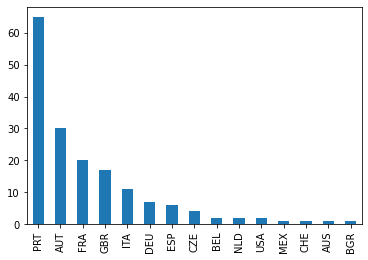

In [52]:
data_resort['country'].value_counts().plot(kind='bar')

In [53]:
#Calculate total bookings per country in city hotels

In [54]:
data_city['country'].value_counts()

PRT    17
DEU    10
FRA     5
ITA     5
GBR     2
CHN     2
ESP     2
MEX     1
BEL     1
ROU     1
IRL     1
Name: country, dtype: int64

<AxesSubplot:>

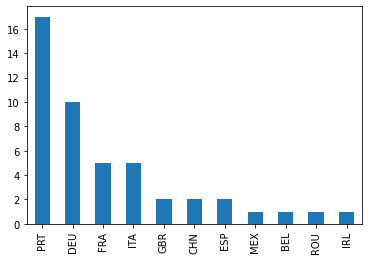

In [55]:
data_city['country'].value_counts().plot(kind='bar')

In [56]:
#Calculate total bookings per market segment in resort hotels

In [57]:
data_resort['market_segment'].value_counts()

Corporate        130
Direct            16
Online TA         14
Offline TA/TO      8
Groups             1
Complementary      1
Name: market_segment, dtype: int64

<AxesSubplot:>

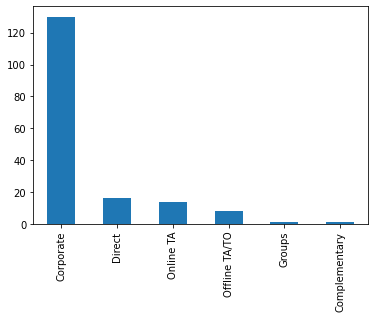

In [58]:
data_resort['market_segment'].value_counts().plot(kind='bar')

In [59]:
#Calculate total bookings per market segment in city hotels

In [60]:
data_city['market_segment'].value_counts()

Online TA        30
Offline TA/TO    10
Direct            5
Complementary     1
Corporate         1
Name: market_segment, dtype: int64

<AxesSubplot:>

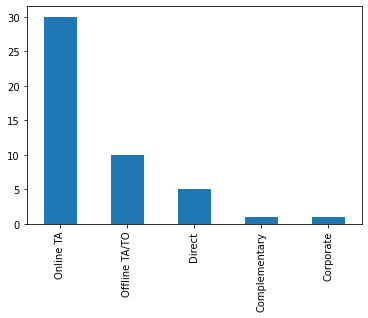

In [61]:
data_city['market_segment'].value_counts().plot(kind='bar')

In [62]:
#Distribution of market segment pero loyalty in resort hotels

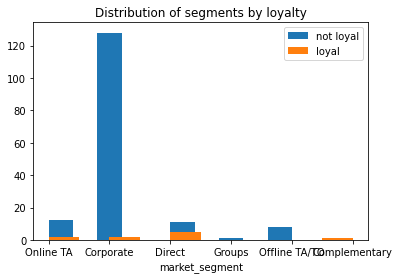

In [63]:
plt.hist('market_segment', data = data_resort[data_resort['is_repeated_guest'] == 0], alpha=1, label='not loyal');
plt.hist('market_segment', data = data_resort[data_resort['is_repeated_guest'] == 1], alpha=1, label='loyal');
plt.title('Distribution of segments by loyalty');
plt.xlabel('market_segment');
plt.legend();

In [64]:
#Distribution of market segment pero loyalty in city hotels

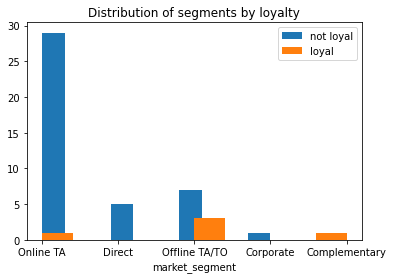

In [65]:
plt.hist('market_segment', data = data_city[data_city['is_repeated_guest'] == 0], alpha=1, label='not loyal');
plt.hist('market_segment', data = data_city[data_city['is_repeated_guest'] == 1], alpha=1, label='loyal');
plt.title('Distribution of segments by loyalty');
plt.xlabel('market_segment');
plt.legend();

In [66]:
#board in resort hotels

<AxesSubplot:xlabel='meal', ylabel='count'>

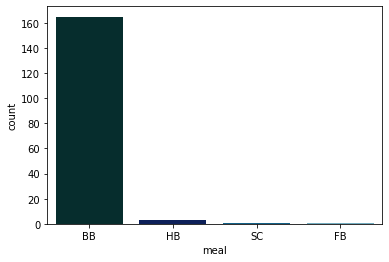

In [67]:
sns.countplot(data_resort['meal'], palette = 'ocean')

In [68]:
#board in city hotels

<AxesSubplot:xlabel='meal', ylabel='count'>

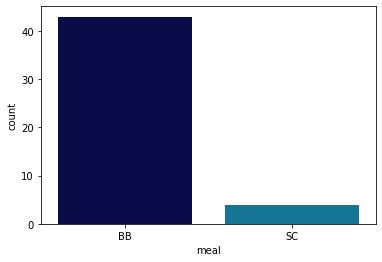

In [69]:
sns.countplot(data_city['meal'], palette = 'ocean')

In [70]:
#customer tupe in resort hotels

<AxesSubplot:xlabel='customer_type', ylabel='count'>

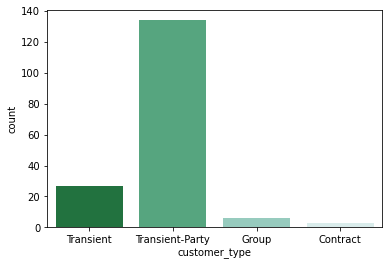

In [71]:
sns.countplot(data_resort['customer_type'], palette = 'BuGn_r')

In [72]:
#customer tupe in city hotels

<AxesSubplot:xlabel='customer_type', ylabel='count'>

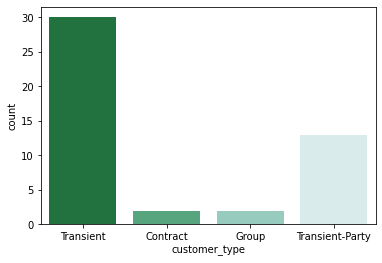

In [73]:
sns.countplot(data_city['customer_type'], palette = 'BuGn_r')

In [74]:
#calculate number of hotels per category

In [75]:
data_resort.shape

(170, 20)

In [76]:
data_city.shape

(47, 20)

In [77]:
#Working in P_value

In [78]:
#calculating mean of ADR

In [79]:
data_resort['adr'].mean()

52.067588235294075

In [80]:
data_city['adr'].mean()

106.20744680851064

In [81]:
#calculating standard desviation of ADR

In [82]:
data_resort['adr'].std()

32.58406276417934

In [83]:
data_city['adr'].std()

28.822743168794375

In [84]:
# Resort hotels
r_samples = 170
r_sample_mean = 52.31
r_sample_std = 32.58

# City hotels
c_samples = 47
c_sample_mean = 106.20
c_sample_std = 28.82

In [85]:
from scipy.stats import ttest_ind, norm

hotels_resort = norm.rvs(loc=r_sample_mean, scale=r_sample_std, size=r_samples)
hotels_city = norm.rvs(loc=c_sample_mean, scale=c_sample_std, size=c_samples)

In [86]:
hotels_resort

array([  3.13913885,  67.06672121,  25.20968582,  36.61754441,
        69.21809321,  84.74980337,  79.32521245, 118.38405415,
        59.85629217,  77.8080792 ,  65.59869885,  47.63350071,
        19.37993328,  81.97403169,  94.71026928,  69.91898949,
        24.33540385,  38.30712766,  92.2384946 ,  41.88858101,
        51.49762013, 136.8680326 ,  49.89660795,  40.88383256,
         4.55339001,  77.18003527,  47.38648878,  65.73740234,
        87.61349152,  64.15354691,  64.14402915, -10.84781262,
        18.76762937,  76.11828539,  86.06557241,  62.42760727,
        27.10871678,  54.60935042,  51.16045475,  77.23813742,
        67.24039891,  14.81058209, 112.48706577,   4.28885004,
        84.13068426,  63.97985562,  64.60986966,  70.30551548,
       137.24092166, 107.94077867,  92.90790202,  74.52760892,
        61.93192655,  37.41679657,  33.96947315, -14.23575852,
        25.02442501,  34.25136452,  28.85758451,  33.35972545,
        48.9462916 ,  57.12164468,  53.66713143,  83.48

In [87]:
hotels_city

array([134.06529694, 132.66708744, 108.10887602, 122.93240825,
        92.9569756 , 114.77086551, 120.2664444 ,  95.94232295,
        68.95892713,  90.15897383,  62.46392663,  89.01056675,
       160.10473587, 101.57451844,  90.10855   ,  67.01880587,
       116.81473846,  76.23771481, 134.58995554, 125.5273518 ,
       120.75892373,  88.44976868,  91.98145703, 136.41432819,
       128.32137122,  77.37298063, 121.37830958, 100.79538269,
        83.74732415, 114.37280865, 115.59070905, 109.40917552,
       113.16850614, 153.77936202,  77.36722492,  85.14332322,
        98.10757136, 110.92451209,  74.10687876,  73.62231407,
        77.39572808, 128.69811092, 105.43274768, 145.60969855,
       164.18079148, 120.61156689, 114.50689573])

In [ ]:
#calculating ttest

In [88]:
ttest_ind(hotels_resort, hotels_city)

Ttest_indResult(statistic=-9.472656451309028, pvalue=5.153399917769041e-18)

In [89]:
canceled_bookings

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
1,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22
2,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2015-06-23
3,Resort Hotel,1,60,2015,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,2015-05-11
4,Resort Hotel,1,96,2015,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,2015-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44219,City Hotel,1,132,2017,April,17,25,0,0,0,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,D,K,1,No Deposit,9.0,NaN,0,Transient,0.0,0,3,Canceled,2017-04-25
44220,City Hotel,1,4,2017,June,23,5,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,4,A,A,0,No Deposit,NaN,238.0,0,Transient,65.0,0,0,Canceled,2017-06-05
44221,City Hotel,1,7,2017,May,22,31,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,1,A,A,0,No Deposit,NaN,238.0,0,Transient,65.0,0,0,Canceled,2017-05-31
44222,City Hotel,1,6,2017,July,29,17,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,1,1,A,D,0,No Deposit,NaN,238.0,0,Transient,65.0,0,0,No-Show,2017-07-17


In [90]:
canceled_bookings.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                              67
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              4030
company                           43033


In [91]:
canceled_bookings = data.dropna()
canceled_bookings.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [92]:
data.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [ ]:
#Checking correlation in data

In [93]:
data.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


In [94]:
data_corr = data[['is_canceled','lead_time','previous_cancellations','booking_changes','required_car_parking_spaces','total_of_special_requests']]
data_corr

,is_canceled,lead_time,previous_cancellations,booking_changes,required_car_parking_spaces,total_of_special_requests
0,0,342,0,3,0,0
1,0,737,0,4,0,0
2,0,7,0,0,0,0
3,0,13,0,0,0,0
4,0,14,0,0,0,1
...,...,...,...,...,...,...
119385,0,23,0,0,0,0
119386,0,102,0,0,0,2
119387,0,34,0,0,0,4
119388,0,109,0,0,0,0


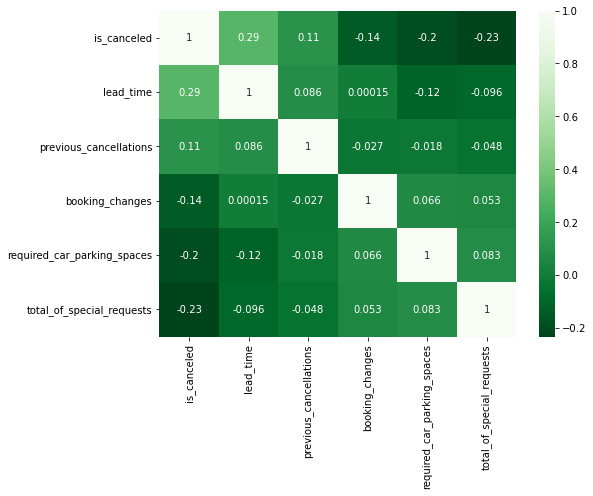

In [95]:
corr_df = data_corr.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, cmap='Greens_r')
plt.show()

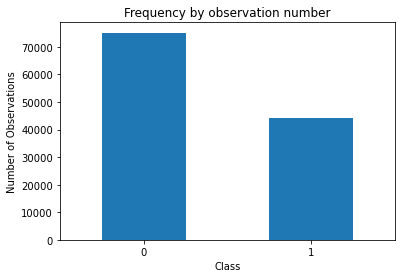

In [98]:
count_classes = pd.value_counts(data['is_canceled'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

In [ ]:
#applying the model

In [94]:
data_model = data[['lead_time','previous_cancellations','booking_changes','required_car_parking_spaces','total_of_special_requests']]
y = data[['is_canceled']]

X_train, X_test, y_train, y_test = train_test_split(data_model, y, test_size=0.3, random_state=42)

In [95]:
model = LogisticRegression()
model.fit( X_train, y_train)

LogisticRegression()

In [96]:
predictions = model.predict(X_test)
predictions

array([0, 0, 0, ..., 1, 0, 1])

In [97]:

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80     22478
           1       0.69      0.43      0.53     13339

    accuracy                           0.72     35817
   macro avg       0.71      0.66      0.66     35817
weighted avg       0.71      0.72      0.70     35817



In [ ]:
#Dealing with imbalance data

In [109]:
from imblearn.over_sampling import SMOTE 

In [120]:
smote = SMOTE()
transformer = StandardScaler().fit(data_model)
data_model = transformer.transform(data_model)
X_sm, y_sm = smote.fit_resample(data_model, y)
y_sm.value_counts()

is_canceled
0              75166
1              75166
dtype: int64

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=100)
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)

classification.score(X_test, y_test)

0.7060310421286031

In [119]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71     22566
           1       0.71      0.70      0.71     22534

    accuracy                           0.71     45100
   macro avg       0.71      0.71      0.71     45100
weighted avg       0.71      0.71      0.71     45100

